## **Introduction**:

Creativity in a neighborhood is important as it creates a strong sense of community through social and cultural interactions. Creative developments within a neighborhood contributes to its unique identity and not only brings residents together, but attracts new visitors.

We chose to display each neighborhoods creativity utilizing datasets that contained information on the number of public art, projects, and courts and rinks. Public art serves as a platform for the residents voices, inviting interaction and interpretation; thus, reinforcing creative expression. Neighborhood projects gathers the community to colloborate and think  of new, creative installments that can better their neighborhood. Courts and rinks promote physical exercise which in turn promotes individuals creativity. 

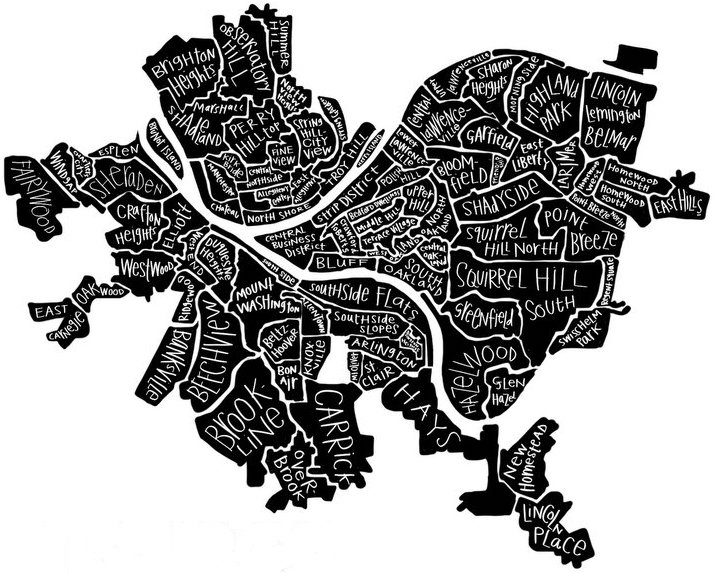

In [1]:
from PIL import Image
img = Image.open("pgh-neighborhoods.jpeg")
img.show()


### **The Metrics**: 

As a group we decided to focus on a theme of creativity and how creativity in a neighborhood can make it stand apart from others. The Bar graph’s data represents the amount of public art in a neighborhood, revealing the neighborhood with the largest amount of public art.


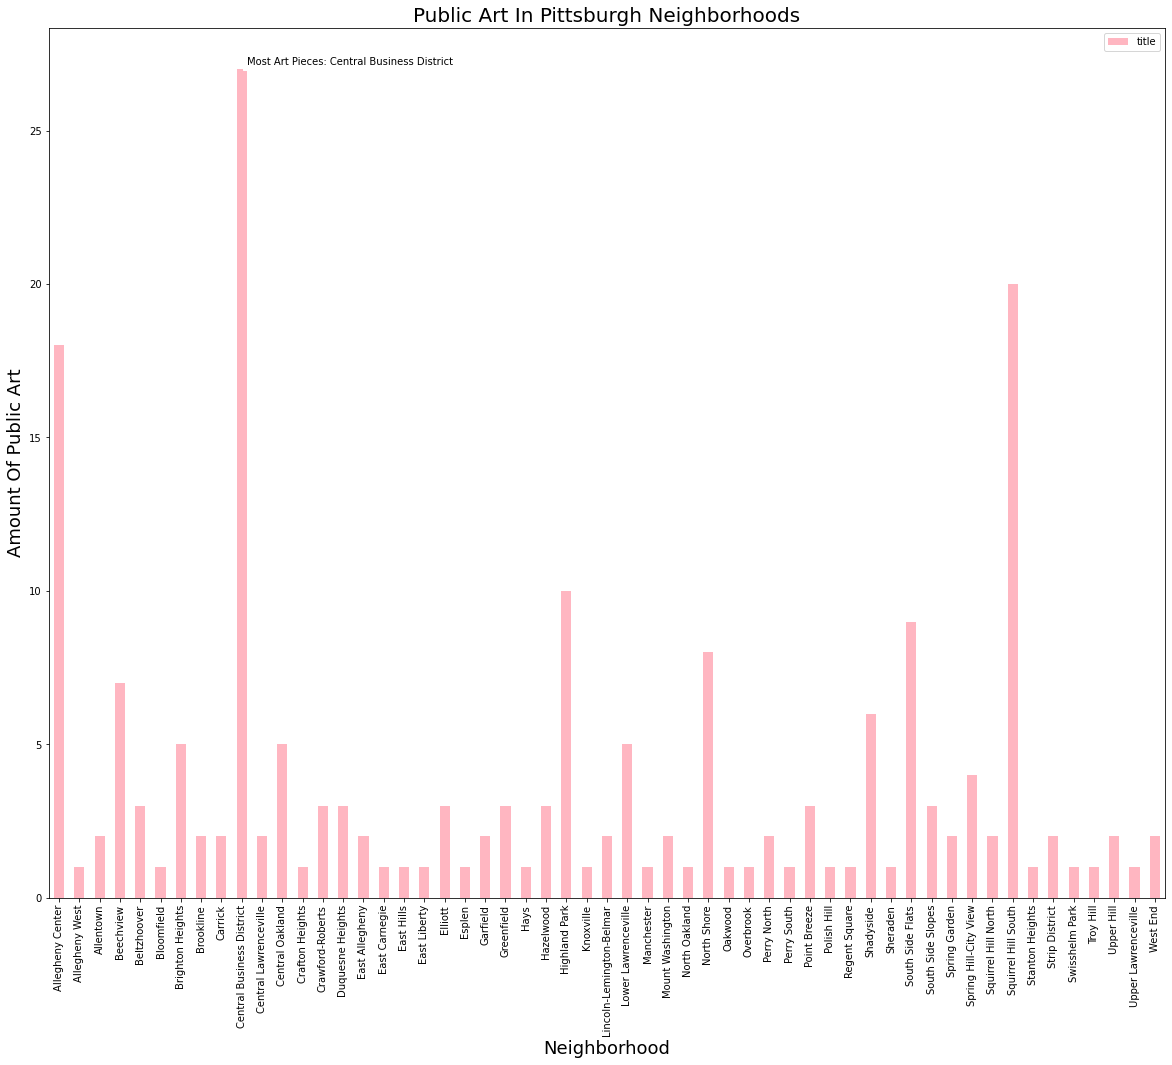

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pitt_public_art = pd.read_csv("Pittsburgh_Public_Art.csv")
city_art = pitt_public_art.groupby('neighborhood')['title'].count().reset_index()
most_neighbor = city_art.loc[city_art['title'].idxmax()]


fig, ax = plt.subplots(figsize=(20,16))
city_art.plot(kind='bar', x='neighborhood', y='title', ax=ax, color='lightpink')
ax.annotate(f'Most Art Pieces: {most_neighbor["neighborhood"]}', xy=(most_neighbor.name, most_neighbor['title']), xytext=(5,5), textcoords='offset points', backgroundcolor='white')


ax.set_title("Public Art In Pittsburgh Neighborhoods", fontsize=20)
ax.set_xlabel("Neighborhood", fontsize=18)
ax.set_ylabel("Amount Of Public Art", fontsize=18)
plt.show()

**Results:**

Though the data reveals the “best” neighborhood in Pittsburgh is Downtown Pittsburgh, my favorite neighborhood is Squirrel-Hill and as the data shows Squirrel-HIll-South comes in second to downtown. Which I feel is accurate. 

### **The Metrics**

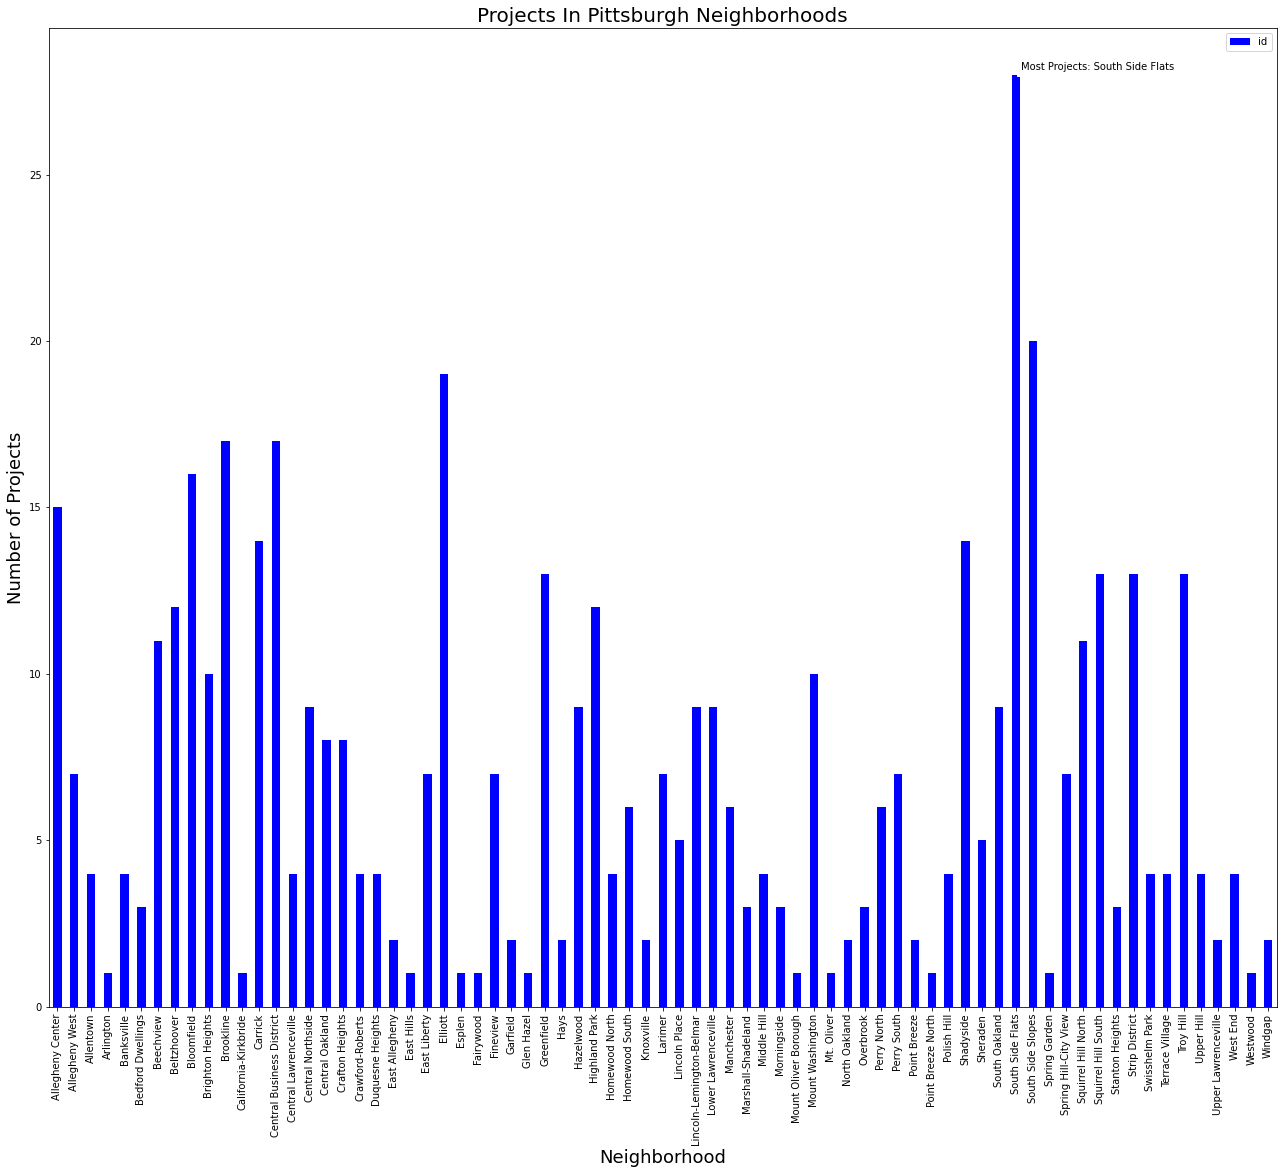

In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt\

projects_data = pd.read_csv("neighborhood_projects.csv")
city_projects = projects_data.groupby('neighborhood')['id'].count().reset_index()
most_projects = city_projects.loc[city_projects['id'].idxmax()]

fig, ax = plt.subplots(figsize=(22,18))
city_projects.plot(kind='bar', x='neighborhood', y='id', ax=ax, color='blue')
ax.annotate(f'Most Projects: {most_projects["neighborhood"]}', xy=(most_projects.name, most_projects['id']), xytext=(5,5), textcoords='offset points', backgroundcolor='white')
ax.set_title("Projects In Pittsburgh Neighborhoods", fontsize=20)
ax.set_xlabel("Neighborhood", fontsize=18)
ax.set_ylabel("Number of Projects", fontsize=18)

plt.show()


**Results:**Winner: South Side Flats  
2nd: South Side Slopes  
3rd: Elliot

The data reveals that the neighborhood with the most projects is South Side Flats, and according to our metric, means it is the most creative in this aspect. By having more projects, I believe it means there is more room for ideas and creation of new things, which altogether makes it a nicer neighborhood. I do believe the metric is fairly accurate for me, as some of my personal favorite areas that I would most like to live in, such as shadyside and squirrel hill are all high ranking in this dataset, as well as south side flats being the best, which I also believe is a nice neighborhood.

### **The Metrics**
Using the dataset that gives the number of courts and rinks present in each neighborhood, I am finding the one with the most amount of courts and rinks which is then the best neighborhood in Pittsburgh.

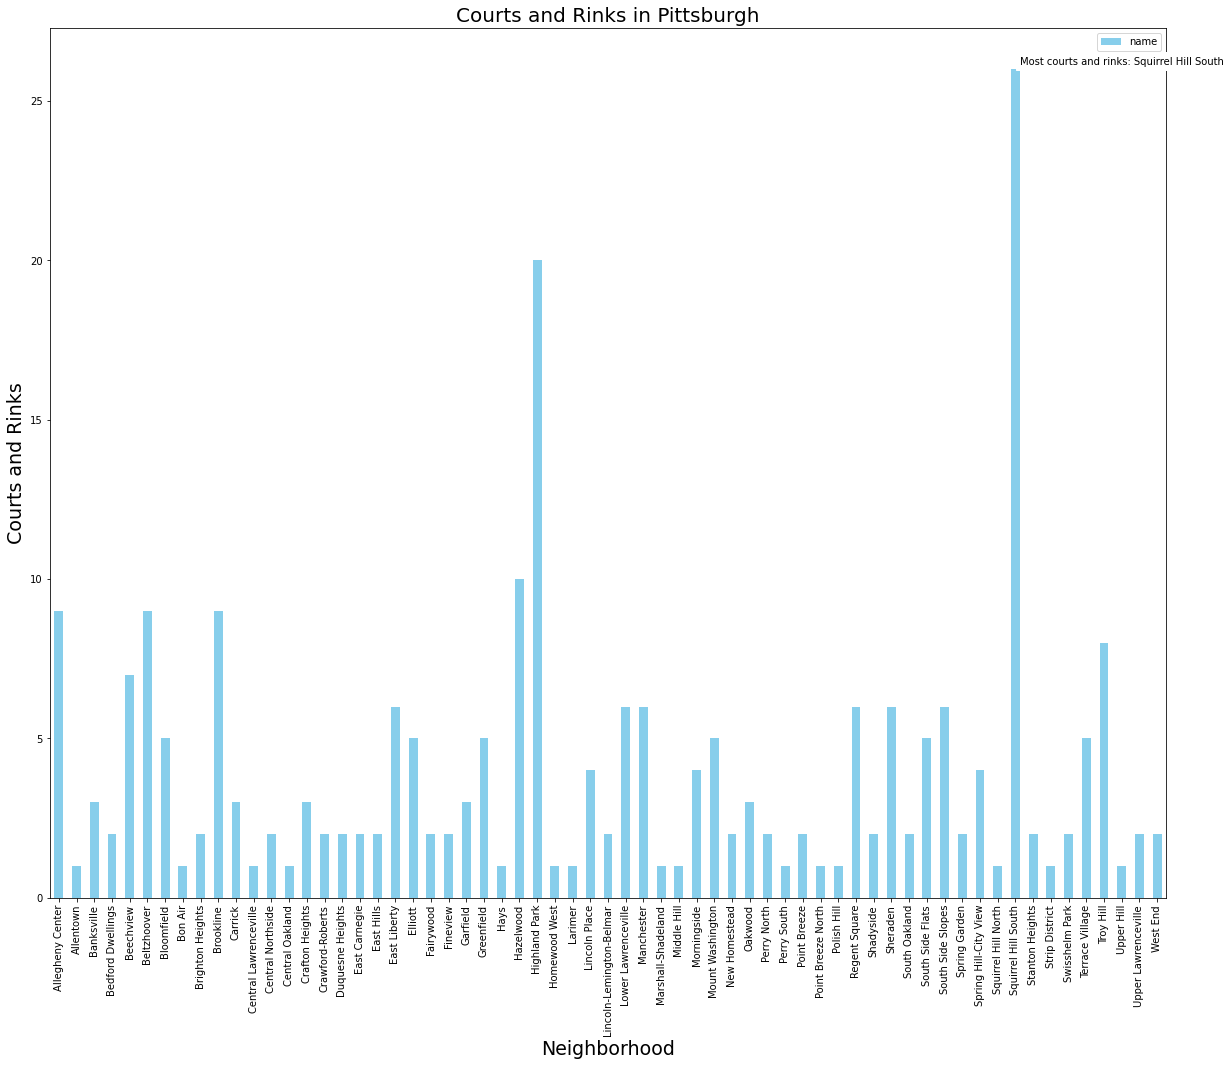

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

courts_rinks = pd.read_csv("courts_rinks.csv")

city_courts = courts_rinks.groupby('neighborhood')['name'].count().reset_index()

most_courts = city_courts.loc[city_courts['name'].idxmax()]

fig, ax = plt.subplots(figsize=(20, 16))
city_courts.plot(kind='bar', x='neighborhood', y='name', ax=ax, color='skyblue')

ax.annotate(f'Most courts and rinks: {most_courts["neighborhood"]}', xy=(most_courts.name, most_courts['name']),
            xytext=(5, 5), textcoords='offset points', backgroundcolor='white')

ax.set_title("Courts and Rinks in Pittsburgh", fontsize=20)
ax.set_xlabel("Neighborhood", fontsize=19)
ax.set_ylabel("Courts and Rinks", fontsize=19)

plt.show()

For this code I began by importing the necessary libraries: pandas, geopandas, and matplot. The variable courts_rinks reads the data from the csv file 'courts_rinks.csv.' The city_courts extracts the number of neighborhoods and courts and rinks in each neighborhood. Then it assign a data frame with the row as 'neighborhood' for the names of each neighborhood and the column as 'name' for the total number of courts and rinks to its corresponding neighborhood. 'fig, ax = plt.subplots(figsize=(20,16)) creates the figure and axis. city_courts.plot(kind='bar', x='neighborhood', y='name', ax=ax, color='skyblue') assigns the x and y axis name and the color of the bars on the graph. ax.annotate function then creates a note on the graph to show the neighborhood with the most number of courts and rinks, Squirrel Hill South. The chart provides a clear overview of the ditribution of courts and rinks across neighborhoods in Pittsburgh, Pennsylvania. 

#### **The Results:**

##### The Best Neighborhood: Squirrel Hill South
##### Second Best Neighborhood: Highland Park
##### Third Best Neighborhood: Hazlewood

##### Squirrel Hill South is a highly populated neighborhood in Alleghany County, located in Pittsburgh, Pennsylvania. It is home to a total of 26 courts and rinks, making it a neighborhood full of creativity. 


### **The Combined Metrics**

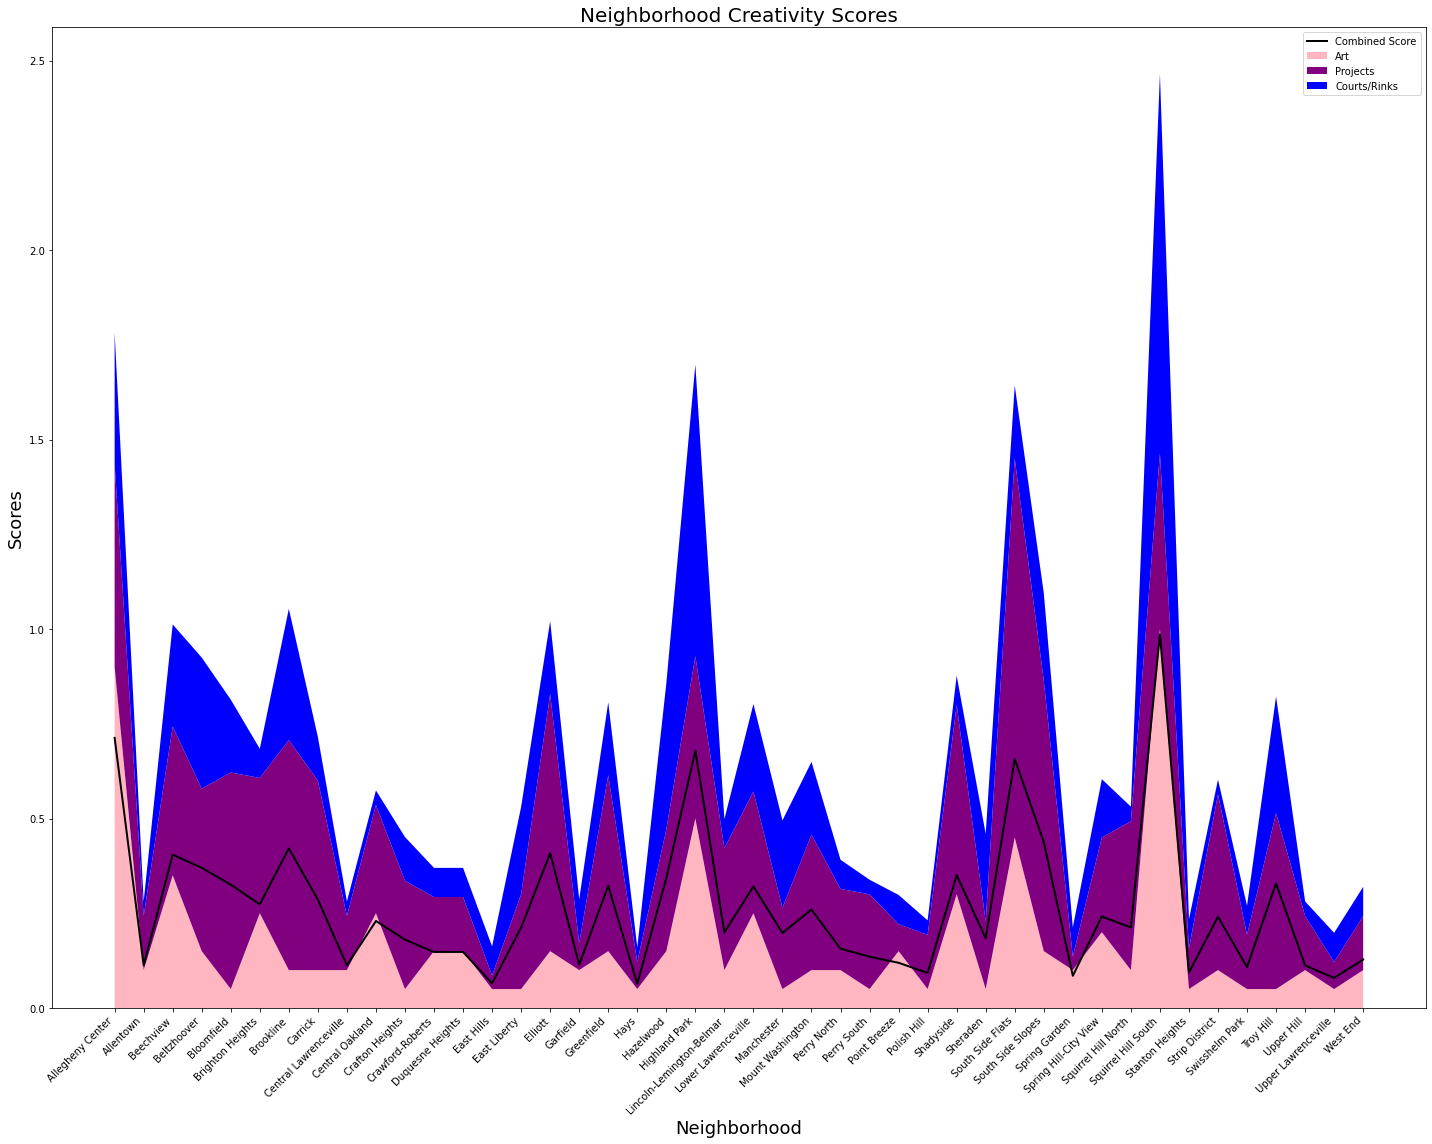

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

pitt_public_art = pd.read_csv("Pittsburgh_Public_Art.csv")
projects_data = pd.read_csv("neighborhood_projects.csv")
courts_rinks = pd.read_csv("courts_rinks.csv")
city_art = pitt_public_art.groupby('neighborhood')['title'].count().reset_index()
city_projects = projects_data.groupby('neighborhood')['id'].count().reset_index()
city_courts = courts_rinks.groupby('neighborhood')['name'].count().reset_index()

combined_db = city_art.merge(city_projects, on='neighborhood', suffixes=('_art','_projects'))
combined_db = combined_db.merge(city_courts, on= 'neighborhood')

combined_db['total_art'] = combined_db['title']
combined_db['total_projects'] = combined_db['id']
combined_db['total_courts'] = combined_db['name']

combined_db['score_art'] = combined_db['total_art']/combined_db['total_art'].max()
combined_db['score_projects'] = combined_db['total_projects']/combined_db['total_projects'].max()
combined_db['score_courts'] = combined_db['total_courts']/combined_db['total_courts'].max()

combined_db['combined_score'] = (
    0.4 * combined_db['score_art'] +
    0.4 * combined_db['score_projects'] +
    0.4 * combined_db['score_courts']
)

fig, ax = plt.subplots(figsize=(20, 16))

ax.stackplot(
    combined_db['neighborhood'],
    combined_db['score_art'],
    combined_db['score_projects'],
    combined_db['score_courts'],
    labels=['Art', 'Projects', 'Courts/Rinks'],
    colors=['lightpink', 'purple', 'blue']
)

ax.plot(combined_db['neighborhood'], combined_db['combined_score'], label='Combined Score', color='black', linewidth=2)

ax.set_title("Neighborhood Creativity Scores", fontsize=20)
ax.set_xlabel("Neighborhood", fontsize=18)
ax.set_ylabel("Scores", fontsize=18)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**The final results: The winner is**


**Squirrel Hill South**

**How: ** 

 We used a combined scoring metric to calculate the overall preformace of multiple neighborhoods across our three variables. Each variable has its own score based on the average in each neighborhood. 
Using the data gathered from each metric (projects, courts and rinks, and public art), we got the conclusion based off of the average of each neighborhoods scoring in each metric. Meaning the neighborhood that averaged a higher amount of courts and rinks, higher amount of public art, and higher amount of public projects placed higher in the final ranking. Overall, our conclusion provides a metric to measure the overall highest creativity in each neighborhood, which we believe points to it being the nicest neighborhood. 

When using the merging method only the common neighborhoods in all datasets will stay. Neighborhoods that are only represented in one dataset are excluded in the final graph. 

**Reflections**
---------------

**Amyia's Reflection**:

I'm a sophomore so this is my second year living in Pittsburgh, my favorite neighborhood that I have visited thus far would have to be Shadyside. I frequently visit Shadyside since my older brother lives there. From our data it can be concluded that Shadyside lacks creative expression which I don't fully agree with. I have been to Squirrel Hill several times and would have to agree with what the data concludes. 

**Jeana's Reflection**:

**Josh's Reflection**: